In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [110]:
df = pd.read_csv("Project_survey.csv")
print(df)

                           Timestamp      Age: Gender:   Location:  \
0    2021/10/16 11:41:05 AM GMT+5:30        25    Male     Gurgaon   
1    2021/10/16 11:44:10 AM GMT+5:30        25    Male   Ahmedabad   
2    2021/10/16 11:51:49 AM GMT+5:30        24    Male     Kolkata   
3    2021/10/16 11:51:54 AM GMT+5:30        24    Male     Gurgaon   
4    2021/10/16 11:52:22 AM GMT+5:30        24    Male     Kolkata   
..                               ...       ...     ...         ...   
218   2021/10/22 9:59:45 AM GMT+5:30        21  Female       Sagar   
219  2021/10/22 10:20:54 AM GMT+5:30  50 years  Female  Ahmedabad    
220   2021/10/22 3:34:36 PM GMT+5:30        28  Female    Haldwani   
221   2021/10/22 4:58:52 PM GMT+5:30        21  Female    Haldwani   
222   2021/10/22 7:03:08 PM GMT+5:30   20 year  Female    Rudrapur   

             Profession: Household Income (monthly):  \
0                Service                70000-100000   
1            MBA Student                70000-1

In [111]:
df.columns

Index(['Timestamp', 'Age:', 'Gender:', 'Location:', 'Profession:',
       'Household Income (monthly):',
       '1. Have you been affected with COVID 19?',
       '2. Are you vaccinated for COVID 19?',
       '3. How much lockdown affected you? [Financially]',
       '3. How much lockdown affected you? [Physically]',
       '3. How much lockdown affected you? [Mentally]',
       '4. Are you suffering from any comorbidity?',
       '5. How often do you exercise?',
       '6. Do you think physical exercise helps in mental well being?',
       '7. How often do you travel? [For work]',
       '7. How often do you travel? [For emergency]',
       '7. How often do you travel? [Vacation]',
       '8. How seriously you're following covid 19 precautions?',
       '9. Do you feel covid 19 affected your work life?',
       '10. Did you change your profession during covid 19?',
       '11. How much you're focusing on your issues during covid 19? [Physical Health]',
       '11. How much you're focu

In [112]:
df.columns = ["ts","age","gender","location","prof","income",
              "covidaff","vaccine","fin_aff","phy_aff","men_aff","comorb","ex_fq","pov_ex","trv_work",
              "trv_emrg","trv_vaca","cov_prec","aff_cov_wrklf","change_pf","focus_ph","focus_mh","focus_fin"]
df.columns

Index(['ts', 'age', 'gender', 'location', 'prof', 'income', 'covidaff',
       'vaccine', 'fin_aff', 'phy_aff', 'men_aff', 'comorb', 'ex_fq', 'pov_ex',
       'trv_work', 'trv_emrg', 'trv_vaca', 'cov_prec', 'aff_cov_wrklf',
       'change_pf', 'focus_ph', 'focus_mh', 'focus_fin'],
      dtype='object')

In [113]:
df1 = df.drop("ts",axis=1);df1

,age,gender,location,prof,income,covidaff,vaccine,fin_aff,phy_aff,men_aff,...,pov_ex,trv_work,trv_emrg,trv_vaca,cov_prec,aff_cov_wrklf,change_pf,focus_ph,focus_mh,focus_fin
0,25,Male,Gurgaon,Service,70000-100000,"Yes, I had symptoms and was detected positive",Yes only 1st dose,Slightly affected,Moderately affected,Moderately affected,...,Yes,Rarely,Rarely,Rarely,Wearing mask whenever going out;Always carryin...,4,No,Moderate,Moderate,Moderate
1,25,Male,Ahmedabad,MBA Student,70000-100000,"Yes, I had symptoms and was detected positive",Yes completed both dose,Not affected,Slightly affected,Very much affected,...,Maybe,Frequently,Rarely,Rarely,Wearing mask whenever going out,3,No,Very less,Moderate,Moderate
2,24,Male,Kolkata,Student,30000-50000,"No, I had symptoms of covid but never tested",Yes completed both dose,Moderately affected,Not affected,Not affected,...,Yes,Rarely,Rarely,Frequently,Wearing mask whenever going out;Always carryin...,4,No,Moderate,Moderate,Moderate
3,24,Male,Gurgaon,Production engineer,50000-70000,"No, I had covid related symptoms but was teste...",Yes completed both dose,Slightly affected,Very much affected,Severely affected,...,Yes,Frequently,Rarely,Rarely,Wearing mask whenever going out;Always carryin...,7,No,Very much,Very much,Moderate
4,24,Male,Kolkata,Engineer,10000-30000,No I never had symptoms of covid,Yes completed both dose,Very much affected,Very much affected,Severely affected,...,Yes,Rarely,Frequently,Rarely,Wearing mask whenever going out;Always carryin...,7,No,Very less,Very less,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,21,Female,Sagar,Student,less than 10000,No I never had symptoms of covid,Yes completed both dose,Slightly affected,Not affected,Slightly affected,...,Yes,Rarely,Rarely,Rarely,Wearing mask whenever going out;Always carryin...,1,No,Very much,Very much,Very much
219,50 years,Female,Ahmedabad,Job,50000-70000,"No, I had covid related symptoms but was teste...",Yes completed both dose,Very much affected,Moderately affected,Very much affected,...,Yes,Frequently,Rarely,Frequently,Wearing mask whenever going out;Always carryin...,6,No,Very much,Very much,Very much
220,28,Female,Haldwani,Nursing tutor,less than 10000,"No, I had covid related symptoms but was teste...",Yes completed both dose,Slightly affected,Slightly affected,Slightly affected,...,Yes,Rarely,Rarely,Rarely,Wearing mask whenever going out;Always carryin...,5,No,Moderate,Moderate,Moderate
221,21,Female,Haldwani,Student,30000-50000,"Yes, I had symptoms and was detected positive",Yes completed both dose,Slightly affected,Very much affected,Moderately affected,...,Yes,Frequently,Frequently,Rarely,Wearing mask whenever going out;Always carryin...,6,No,Very much,Very much,Very much


In [114]:
df1.age = pd.to_numeric(df1.age,errors = "coerce").astype(pd.Int16Dtype())
df1.prof = df1.prof.str.lower();df1

,age,gender,location,prof,income,covidaff,vaccine,fin_aff,phy_aff,men_aff,...,pov_ex,trv_work,trv_emrg,trv_vaca,cov_prec,aff_cov_wrklf,change_pf,focus_ph,focus_mh,focus_fin
0,25,Male,Gurgaon,service,70000-100000,"Yes, I had symptoms and was detected positive",Yes only 1st dose,Slightly affected,Moderately affected,Moderately affected,...,Yes,Rarely,Rarely,Rarely,Wearing mask whenever going out;Always carryin...,4,No,Moderate,Moderate,Moderate
1,25,Male,Ahmedabad,mba student,70000-100000,"Yes, I had symptoms and was detected positive",Yes completed both dose,Not affected,Slightly affected,Very much affected,...,Maybe,Frequently,Rarely,Rarely,Wearing mask whenever going out,3,No,Very less,Moderate,Moderate
2,24,Male,Kolkata,student,30000-50000,"No, I had symptoms of covid but never tested",Yes completed both dose,Moderately affected,Not affected,Not affected,...,Yes,Rarely,Rarely,Frequently,Wearing mask whenever going out;Always carryin...,4,No,Moderate,Moderate,Moderate
3,24,Male,Gurgaon,production engineer,50000-70000,"No, I had covid related symptoms but was teste...",Yes completed both dose,Slightly affected,Very much affected,Severely affected,...,Yes,Frequently,Rarely,Rarely,Wearing mask whenever going out;Always carryin...,7,No,Very much,Very much,Moderate
4,24,Male,Kolkata,engineer,10000-30000,No I never had symptoms of covid,Yes completed both dose,Very much affected,Very much affected,Severely affected,...,Yes,Rarely,Frequently,Rarely,Wearing mask whenever going out;Always carryin...,7,No,Very less,Very less,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,21,Female,Sagar,student,less than 10000,No I never had symptoms of covid,Yes completed both dose,Slightly affected,Not affected,Slightly affected,...,Yes,Rarely,Rarely,Rarely,Wearing mask whenever going out;Always carryin...,1,No,Very much,Very much,Very much
219,<NA>,Female,Ahmedabad,job,50000-70000,"No, I had covid related symptoms but was teste...",Yes completed both dose,Very much affected,Moderately affected,Very much affected,...,Yes,Frequently,Rarely,Frequently,Wearing mask whenever going out;Always carryin...,6,No,Very much,Very much,Very much
220,28,Female,Haldwani,nursing tutor,less than 10000,"No, I had covid related symptoms but was teste...",Yes completed both dose,Slightly affected,Slightly affected,Slightly affected,...,Yes,Rarely,Rarely,Rarely,Wearing mask whenever going out;Always carryin...,5,No,Moderate,Moderate,Moderate
221,21,Female,Haldwani,student,30000-50000,"Yes, I had symptoms and was detected positive",Yes completed both dose,Slightly affected,Very much affected,Moderately affected,...,Yes,Frequently,Frequently,Rarely,Wearing mask whenever going out;Always carryin...,6,No,Very much,Very much,Very much


In [115]:
df1["prof"].replace(to_replace = ["student", "student ", "nursing", "studying", "nursing student", "medical student", "mba student", "graphic designer", "completed bachelors, studying for cfa ", "design student ", "college student", "mbbs", "bsc nursing", "students ", "nursing students", "b.sc nursing", "b. sc nursing", "students ", "bsc nursing ", "nursing ", "students"], value = "student", inplace = True)
df1["prof"].replace(to_replace = ["service", "production engineer", "engineer", "it professional", "government servant", "employee in private company", "job at it", "graduate", "software developer", "private sector (business)", "educator ", "job", "it specialist", "marketing", "athlete/accountant", "doctor", "private ", "sales executive ", "trader", "private job", "graduate engineer", "government service", "govt employee", "gorvenment servant", "government", "digital creator, photografer, baker", "business", "government job", "insurance advisor", "government officer", "govt job", "pvt job ", "pvt  job", "govt service", "president", "executive ", "govt servant ", "self employed", "govt. service", "professor in pharmacy", "government employee", "advocate ", "govt servent ", "govt servant", "doctor ", "serving ", "teacher", "self employment", "government job ", "govt. service ", "data scientist", "executive in supply chain management ", "govt.employee", "government service ", "it", "corporate professional", "govt. servant ", "central government services ", "service ", "govt officer", "print media employee ", "physiotherapist", "hardware engineer", "officer", "invigilator for idp", "teaching", "nurse", "assistant manager", "agriculture", "job ", "nursing tutor", "govt. servant", "pvt job"], value = "employed", inplace = True)
df1["prof"].replace(to_replace = ["retired govt service", "retd ongc officer", "retired", "retired ", "home maker", "retired from ongc ", "household", "retired government servant", "house manager ", "housewife ", "house wife", "no", "un employees", "housewife"], value = "unemployed", inplace = True)

In [116]:
df1

,age,gender,location,prof,income,covidaff,vaccine,fin_aff,phy_aff,men_aff,...,pov_ex,trv_work,trv_emrg,trv_vaca,cov_prec,aff_cov_wrklf,change_pf,focus_ph,focus_mh,focus_fin
0,25,Male,Gurgaon,employed,70000-100000,"Yes, I had symptoms and was detected positive",Yes only 1st dose,Slightly affected,Moderately affected,Moderately affected,...,Yes,Rarely,Rarely,Rarely,Wearing mask whenever going out;Always carryin...,4,No,Moderate,Moderate,Moderate
1,25,Male,Ahmedabad,student,70000-100000,"Yes, I had symptoms and was detected positive",Yes completed both dose,Not affected,Slightly affected,Very much affected,...,Maybe,Frequently,Rarely,Rarely,Wearing mask whenever going out,3,No,Very less,Moderate,Moderate
2,24,Male,Kolkata,student,30000-50000,"No, I had symptoms of covid but never tested",Yes completed both dose,Moderately affected,Not affected,Not affected,...,Yes,Rarely,Rarely,Frequently,Wearing mask whenever going out;Always carryin...,4,No,Moderate,Moderate,Moderate
3,24,Male,Gurgaon,employed,50000-70000,"No, I had covid related symptoms but was teste...",Yes completed both dose,Slightly affected,Very much affected,Severely affected,...,Yes,Frequently,Rarely,Rarely,Wearing mask whenever going out;Always carryin...,7,No,Very much,Very much,Moderate
4,24,Male,Kolkata,employed,10000-30000,No I never had symptoms of covid,Yes completed both dose,Very much affected,Very much affected,Severely affected,...,Yes,Rarely,Frequently,Rarely,Wearing mask whenever going out;Always carryin...,7,No,Very less,Very less,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,21,Female,Sagar,student,less than 10000,No I never had symptoms of covid,Yes completed both dose,Slightly affected,Not affected,Slightly affected,...,Yes,Rarely,Rarely,Rarely,Wearing mask whenever going out;Always carryin...,1,No,Very much,Very much,Very much
219,<NA>,Female,Ahmedabad,employed,50000-70000,"No, I had covid related symptoms but was teste...",Yes completed both dose,Very much affected,Moderately affected,Very much affected,...,Yes,Frequently,Rarely,Frequently,Wearing mask whenever going out;Always carryin...,6,No,Very much,Very much,Very much
220,28,Female,Haldwani,employed,less than 10000,"No, I had covid related symptoms but was teste...",Yes completed both dose,Slightly affected,Slightly affected,Slightly affected,...,Yes,Rarely,Rarely,Rarely,Wearing mask whenever going out;Always carryin...,5,No,Moderate,Moderate,Moderate
221,21,Female,Haldwani,student,30000-50000,"Yes, I had symptoms and was detected positive",Yes completed both dose,Slightly affected,Very much affected,Moderately affected,...,Yes,Frequently,Frequently,Rarely,Wearing mask whenever going out;Always carryin...,6,No,Very much,Very much,Very much


In [117]:
df1["prof"].unique()

array(['employed', 'student', 'unemployed'], dtype=object)

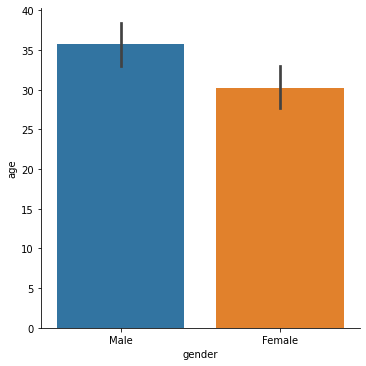

In [118]:
sns.catplot(data=df1, kind="bar", x="gender", y="age")

In [119]:
df1['age_grp'] = pd.cut(df1.age,5)
df1

,age,gender,location,prof,income,covidaff,vaccine,fin_aff,phy_aff,men_aff,...,trv_work,trv_emrg,trv_vaca,cov_prec,aff_cov_wrklf,change_pf,focus_ph,focus_mh,focus_fin,age_grp
0,25,Male,Gurgaon,employed,70000-100000,"Yes, I had symptoms and was detected positive",Yes only 1st dose,Slightly affected,Moderately affected,Moderately affected,...,Rarely,Rarely,Rarely,Wearing mask whenever going out;Always carryin...,4,No,Moderate,Moderate,Moderate,"(16.952, 26.6]"
1,25,Male,Ahmedabad,student,70000-100000,"Yes, I had symptoms and was detected positive",Yes completed both dose,Not affected,Slightly affected,Very much affected,...,Frequently,Rarely,Rarely,Wearing mask whenever going out,3,No,Very less,Moderate,Moderate,"(16.952, 26.6]"
2,24,Male,Kolkata,student,30000-50000,"No, I had symptoms of covid but never tested",Yes completed both dose,Moderately affected,Not affected,Not affected,...,Rarely,Rarely,Frequently,Wearing mask whenever going out;Always carryin...,4,No,Moderate,Moderate,Moderate,"(16.952, 26.6]"
3,24,Male,Gurgaon,employed,50000-70000,"No, I had covid related symptoms but was teste...",Yes completed both dose,Slightly affected,Very much affected,Severely affected,...,Frequently,Rarely,Rarely,Wearing mask whenever going out;Always carryin...,7,No,Very much,Very much,Moderate,"(16.952, 26.6]"
4,24,Male,Kolkata,employed,10000-30000,No I never had symptoms of covid,Yes completed both dose,Very much affected,Very much affected,Severely affected,...,Rarely,Frequently,Rarely,Wearing mask whenever going out;Always carryin...,7,No,Very less,Very less,Moderate,"(16.952, 26.6]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,21,Female,Sagar,student,less than 10000,No I never had symptoms of covid,Yes completed both dose,Slightly affected,Not affected,Slightly affected,...,Rarely,Rarely,Rarely,Wearing mask whenever going out;Always carryin...,1,No,Very much,Very much,Very much,"(16.952, 26.6]"
219,<NA>,Female,Ahmedabad,employed,50000-70000,"No, I had covid related symptoms but was teste...",Yes completed both dose,Very much affected,Moderately affected,Very much affected,...,Frequently,Rarely,Frequently,Wearing mask whenever going out;Always carryin...,6,No,Very much,Very much,Very much,NaN
220,28,Female,Haldwani,employed,less than 10000,"No, I had covid related symptoms but was teste...",Yes completed both dose,Slightly affected,Slightly affected,Slightly affected,...,Rarely,Rarely,Rarely,Wearing mask whenever going out;Always carryin...,5,No,Moderate,Moderate,Moderate,"(26.6, 36.2]"
221,21,Female,Haldwani,student,30000-50000,"Yes, I had symptoms and was detected positive",Yes completed both dose,Slightly affected,Very much affected,Moderately affected,...,Frequently,Frequently,Rarely,Wearing mask whenever going out;Always carryin...,6,No,Very much,Very much,Very much,"(16.952, 26.6]"


In [120]:
df1.columns

Index(['age', 'gender', 'location', 'prof', 'income', 'covidaff', 'vaccine',
       'fin_aff', 'phy_aff', 'men_aff', 'comorb', 'ex_fq', 'pov_ex',
       'trv_work', 'trv_emrg', 'trv_vaca', 'cov_prec', 'aff_cov_wrklf',
       'change_pf', 'focus_ph', 'focus_mh', 'focus_fin', 'age_grp'],
      dtype='object')

In [121]:
df_age = pd.concat([df1.income,df1.fin_aff.str.get_dummies()],axis=1);print(df_age)
p = df_age.groupby("income").aggregate(sum);p

              income  Moderately affected  Not affected  Severely affected  \
0       70000-100000                    0             0                  0   
1       70000-100000                    0             1                  0   
2        30000-50000                    1             0                  0   
3        50000-70000                    0             0                  0   
4        10000-30000                    0             0                  0   
..               ...                  ...           ...                ...   
218  less than 10000                    0             0                  0   
219      50000-70000                    0             0                  0   
220  less than 10000                    0             0                  0   
221      30000-50000                    0             0                  0   
222  less than 10000                    1             0                  0   

     Slightly affected  Very much affected  
0                 

,Moderately affected,Not affected,Severely affected,Slightly affected,Very much affected
income,,,,,
10000-30000,10,7,3,12,7
30000-50000,8,9,0,12,3
50000-70000,6,7,1,5,3
70000-100000,6,10,1,15,0
less than 10000,11,10,5,15,2
more than 100000,8,34,1,10,2


In [122]:
df123 = pd.DataFrame(pd.value_counts(df1.income));df123

,income
more than 100000,55
less than 10000,43
10000-30000,39
70000-100000,32
30000-50000,32
50000-70000,22


In [123]:
g = p.div(df123['income'],axis=0);g

,Moderately affected,Not affected,Severely affected,Slightly affected,Very much affected
10000-30000,0.256410,0.179487,0.076923,0.307692,0.179487
30000-50000,0.250000,0.281250,0.000000,0.375000,0.093750
50000-70000,0.272727,0.318182,0.045455,0.227273,0.136364
70000-100000,0.187500,0.312500,0.031250,0.468750,0.000000
less than 10000,0.255814,0.232558,0.116279,0.348837,0.046512
more than 100000,0.145455,0.618182,0.018182,0.181818,0.036364


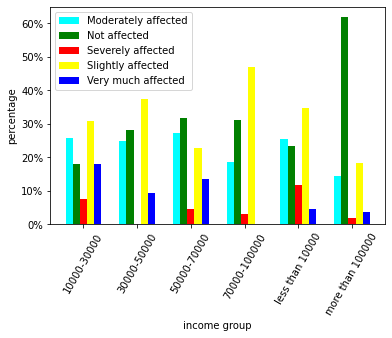

In [124]:
f = plt.figure()
x = np.array([1,2.5,4,5.5,7,8.5])
y = np.array([0,0.1,0.2,0.3,0.4,0.5,0.6])
width = 0.2
plt.bar(x-0.4,g["Moderately affected"],width,color ="cyan")
plt.bar(x-0.2,g["Not affected"],width,color ="green")
plt.bar(x,g["Severely affected"],width,color ="red")
plt.bar(x+0.2,g["Slightly affected"],width,color ="yellow")
plt.bar(x+0.4,g["Very much affected"],width,color ="blue")
plt.xticks(x,list(g.index),rotation = 60)
plt.yticks(y,["0%","10%","20%","30%","40%","50%","60%"])
plt.legend(list(g.columns))
plt.ylabel("percentage")
plt.xlabel("income group")
f.savefig("pllllllll.jpg")

# Age vs Finance affected

In [125]:
df_age = pd.concat([df1.age_grp,df1.fin_aff.str.get_dummies()],axis=1);print(df_age)
p1 = df_age.groupby("age_grp").aggregate(sum);p1

            age_grp  Moderately affected  Not affected  Severely affected  \
0    (16.952, 26.6]                    0             0                  0   
1    (16.952, 26.6]                    0             1                  0   
2    (16.952, 26.6]                    1             0                  0   
3    (16.952, 26.6]                    0             0                  0   
4    (16.952, 26.6]                    0             0                  0   
..              ...                  ...           ...                ...   
218  (16.952, 26.6]                    0             0                  0   
219             NaN                    0             0                  0   
220    (26.6, 36.2]                    0             0                  0   
221  (16.952, 26.6]                    0             0                  0   
222             NaN                    1             0                  0   

     Slightly affected  Very much affected  
0                    1        

,Moderately affected,Not affected,Severely affected,Slightly affected,Very much affected
age_grp,,,,,
"(16.952, 26.6]",24,23,8,35,15
"(26.6, 36.2]",7,6,1,7,0
"(36.2, 45.8]",7,6,0,3,0
"(45.8, 55.4]",8,22,1,14,0
"(55.4, 65.0]",2,10,0,3,0


In [126]:
df1["age_grp"].unique()

[(16.952, 26.6], (26.6, 36.2], (45.8, 55.4], NaN, (36.2, 45.8], (55.4, 65.0]]
Categories (5, interval[float64]): [(16.952, 26.6] < (26.6, 36.2] < (36.2, 45.8] < (45.8, 55.4] < (55.4, 65.0]]

In [127]:
df1_1 = pd.DataFrame(pd.value_counts(df1.age_grp))
df1_1

,age_grp
"(16.952, 26.6]",105
"(45.8, 55.4]",45
"(26.6, 36.2]",21
"(36.2, 45.8]",16
"(55.4, 65.0]",15


In [128]:
g1 = p1.div(df1_1['age_grp'],axis=0);g1

,Moderately affected,Not affected,Severely affected,Slightly affected,Very much affected
"(16.952, 26.6]",0.228571,0.219048,0.076190,0.333333,0.142857
"(26.6, 36.2]",0.333333,0.285714,0.047619,0.333333,0.000000
"(36.2, 45.8]",0.437500,0.375000,0.000000,0.187500,0.000000
"(45.8, 55.4]",0.177778,0.488889,0.022222,0.311111,0.000000
"(55.4, 65.0]",0.133333,0.666667,0.000000,0.200000,0.000000


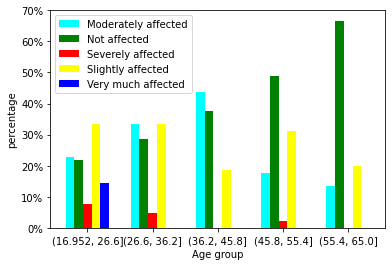

In [129]:
f1 = plt.figure()
x1 = np.array([1,2.5,4,5.5,7])
y1 = np.array([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7])
width = 0.2
plt.bar(x1-0.4,g1["Moderately affected"],width,color ="cyan")
plt.bar(x1-0.2,g1["Not affected"],width,color ="green")
plt.bar(x1,g1["Severely affected"],width,color ="red")
plt.bar(x1+0.2,g1["Slightly affected"],width,color ="yellow")
plt.bar(x1+0.4,g1["Very much affected"],width,color ="blue")
plt.xticks(x1,list(g1.index),rotation = 0)
plt.yticks(y1,["0%","10%","20%","30%","40%","50%","60%","70%"])
plt.legend(list(g1.columns))
plt.ylabel("percentage")
plt.xlabel("Age group")
f1.savefig("age vs finance lockdown.jpg")

# Change of prof vs Income wise

In [130]:
df_prof = pd.concat([df1.income,df1.change_pf.str.get_dummies()],axis=1);print(df_prof)
p3 = df_prof.groupby("income").aggregate(sum);p3

              income  Lost the job  No  Yes, forced to change the job  \
0       70000-100000             0   1                              0   
1       70000-100000             0   1                              0   
2        30000-50000             0   1                              0   
3        50000-70000             0   1                              0   
4        10000-30000             0   1                              0   
..               ...           ...  ..                            ...   
218  less than 10000             0   1                              0   
219      50000-70000             0   1                              0   
220  less than 10000             0   1                              0   
221      30000-50000             0   1                              0   
222  less than 10000             1   0                              0   

     Yes, willingly  
0                 0  
1                 0  
2                 0  
3                 0  
4            

,Lost the job,No,"Yes, forced to change the job","Yes, willingly"
income,,,,
10000-30000,2,32,2,3
30000-50000,0,30,0,2
50000-70000,1,20,0,1
70000-100000,1,29,0,2
less than 10000,4,34,1,4
more than 100000,0,52,0,3


In [131]:
df1_2 = pd.DataFrame(pd.value_counts(df1.income))
df1_2

,income
more than 100000,55
less than 10000,43
10000-30000,39
70000-100000,32
30000-50000,32
50000-70000,22


In [132]:
g3 = p2.div(df1_2["income"], axis = 0)
g3

,Lost the job,No,"Yes, forced to change the job","Yes, willingly"
10000-30000,0.051282,0.820513,0.051282,0.076923
30000-50000,0.000000,0.937500,0.000000,0.062500
50000-70000,0.045455,0.909091,0.000000,0.045455
70000-100000,0.031250,0.906250,0.000000,0.062500
less than 10000,0.093023,0.790698,0.023256,0.093023
more than 100000,0.000000,0.945455,0.000000,0.054545


Text(0.5, 0, 'Income groups')

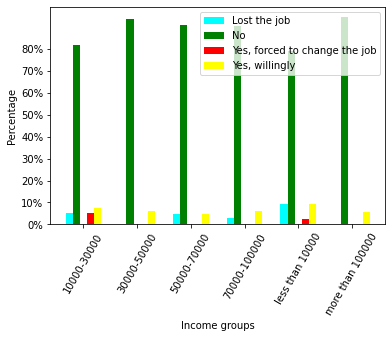

In [133]:
f3 = plt.figure()
x3 = np.array([1, 2.5, 4, 5.5, 7, 8.5])
y3 = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])
width = 0.2
plt.bar(x3 - 0.4, g3["Lost the job"], width, color ="cyan")
plt.bar(x3 - 0.2, g3["No"], width, color = "green")
plt.bar(x3 + 0.2, g3["Yes, forced to change the job"], width, color = "red")
plt.bar(x3 + 0.4, g3["Yes, willingly"], width, color = "yellow")
plt.xticks(x3, list(g3.index), rotation = 60)
plt.yticks(y3, ["0%", "10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%"])
plt.legend(list(g3.columns))
plt.ylabel("Percentage")
plt.xlabel("Income groups")

Text(0.5, 1.0, 'Income groups vs. change of profession')

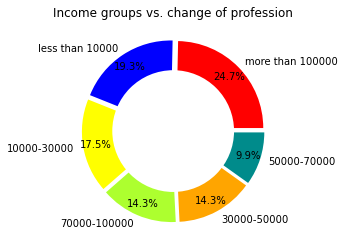

In [144]:
colors = ['#FF0000', '#0000FF', '#FFFF00', 
          '#ADFF2F', '#FFA500', "#008B8B"]
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
plt.pie(df1_2.income, colors=colors, labels= list(df1_2.index),
        autopct = '%1.1f%%', pctdistance=0.85,
        explode = explode)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Income groups vs. change of profession")
#plt.legend(df1_2.index, loc = "upper right", title = "Income group")

# Age group vs Change in worklife

In [109]:
df_chng_worklife = pd.concat([df1.age_grp,df1.aff_cov_wrklf.str.get_dummies()],axis=1);print(df_chng_worklife)
p4 = df_prof.groupby("age_grp").aggregate(sum);p4

AttributeError: Can only use .str accessor with string values!

# Finance focus vs Income group

In [135]:
df_finance_focus = pd.concat([df1.income, df1.focus_fin.str.get_dummies()], axis = 1); print(df_finance_focus)
p5 = df_finance_focus.groupby("income").aggregate(sum); p5

              income  Moderate  Very less  Very much
0       70000-100000         1          0          0
1       70000-100000         1          0          0
2        30000-50000         1          0          0
3        50000-70000         1          0          0
4        10000-30000         1          0          0
..               ...       ...        ...        ...
218  less than 10000         0          0          1
219      50000-70000         0          0          1
220  less than 10000         1          0          0
221      30000-50000         0          0          1
222  less than 10000         0          0          1

[223 rows x 4 columns]


,Moderate,Very less,Very much
income,,,
10000-30000,14,8,17
30000-50000,16,5,11
50000-70000,12,3,7
70000-100000,13,6,13
less than 10000,16,10,17
more than 100000,26,16,13


In [139]:
df1_5 = pd.DataFrame(pd.value_counts(df1.income))
df1_5

,income
more than 100000,55
less than 10000,43
10000-30000,39
70000-100000,32
30000-50000,32
50000-70000,22


In [147]:
g5 = p5.div(df1_5["income"], axis = 0)
g5

,Moderate,Very less,Very much
10000-30000,0.358974,0.205128,0.435897
30000-50000,0.500000,0.156250,0.343750
50000-70000,0.545455,0.136364,0.318182
70000-100000,0.406250,0.187500,0.406250
less than 10000,0.372093,0.232558,0.395349
more than 100000,0.472727,0.290909,0.236364


Text(0.5, 0, 'Income groups')

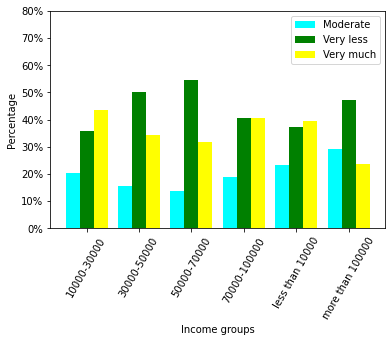

In [152]:
f5 = plt.figure()
x5 = np.array([1, 2.5, 4, 5.5, 7, 8.5])
y5 = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])
width = 0.4
plt.bar(x5 - 0.4, g5["Very less"], width, color ="cyan")
plt.bar(x5, g5["Moderate"], width, color = "green")
#plt.bar(x3 + 0.2, g3["Yes, forced to change the job"], width, color = "red")
plt.bar(x5 + 0.4, g5["Very much"], width, color = "yellow")
plt.xticks(x3, list(g5.index), rotation = 60)
plt.yticks(y3, ["0%", "10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%"])
plt.legend(list(g5.columns))
plt.ylabel("Percentage")
plt.xlabel("Income groups")

Text(0.5, 1.0, 'Finance focus vs Income groups')

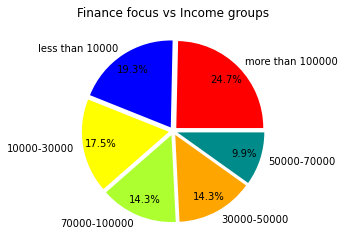

In [145]:
colors = ['#FF0000', '#0000FF', '#FFFF00', 
          '#ADFF2F', '#FFA500', "#008B8B"]
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05]

plt.pie(df1_5.income, colors = colors, labels = df1_5.index,
       autopct = '%1.1f%%', pctdistance = 0.8,
       explode = explode)
plt.title("Finance focus vs Income groups")

# Comorbidity vs Physically affected in Lockdown 

In [157]:
df_comorb = pd.concat([df1.comorb, df1.phy_aff.str.get_dummies()], axis = 1); print(df_comorb)
p6 = df_comorb.groupby("comorb").aggregate(sum); p6

    comorb  Moderately affected  Not affected  Severely affected  \
0       No                    1             0                  0   
1       No                    0             0                  0   
2       No                    0             1                  0   
3       No                    0             0                  0   
4       No                    0             0                  0   
..     ...                  ...           ...                ...   
218     No                    0             1                  0   
219     No                    1             0                  0   
220     No                    0             0                  0   
221     No                    0             0                  0   
222     No                    1             0                  0   

     Slightly affected  Very much affected  
0                    0                   0  
1                    1                   0  
2                    0                   0  
3  

,Moderately affected,Not affected,Severely affected,Slightly affected,Very much affected
comorb,,,,,
No,48,65,5,65,15
Yes,6,2,1,7,3


In [158]:
df1_6 = pd.DataFrame(pd.value_counts(df1.comorb))
df1_6

,comorb
No,198
Yes,19


In [160]:
g6 = p6.div(df1_6["comorb"], axis = 0)
g6

,Moderately affected,Not affected,Severely affected,Slightly affected,Very much affected
comorb,,,,,
No,0.242424,0.328283,0.025253,0.328283,0.075758
Yes,0.315789,0.105263,0.052632,0.368421,0.157895


Text(0.5, 0, 'Suffering from Comorbidity')

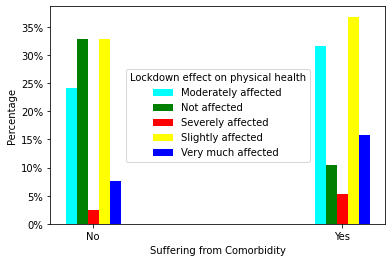

In [171]:
f6 = plt.figure()
x6 = np.array([1, 5.5])
y6 = np.array([0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35])
width = 0.2
plt.bar(x6 - 0.4, g6["Moderately affected"],width,color ="cyan")
plt.bar(x6 - 0.2, g6["Not affected"],width,color ="green")
plt.bar(x6, g6["Severely affected"],width,color ="red")
plt.bar(x6 + 0.2, g6["Slightly affected"],width,color ="yellow")
plt.bar(x6 + 0.4, g6["Very much affected"],width,color ="blue")
plt.xticks(x6, list(g6.index), rotation = 0)
plt.yticks(y6, ["0%", "5%", "10%", "15%", "20%", "25%", "30%", "35%"])
plt.legend(list(g6.columns), title = "Lockdown effect on physical health", loc = "center")
plt.ylabel("Percentage")
plt.xlabel("Suffering from Comorbidity")

In [155]:
df1.columns

Index(['age', 'gender', 'location', 'prof', 'income', 'covidaff', 'vaccine',
       'fin_aff', 'phy_aff', 'men_aff', 'comorb', 'ex_fq', 'pov_ex',
       'trv_work', 'trv_emrg', 'trv_vaca', 'cov_prec', 'aff_cov_wrklf',
       'change_pf', 'focus_ph', 'focus_mh', 'focus_fin', 'age_grp'],
      dtype='object')

In [154]:
df1["comorb"].unique()

array(['No', nan, 'Yes'], dtype=object)

In [31]:
plt.bar?

In [38]:
plt.yscale?

In [12]:
df1.replace?

In [62]:
plt.figure?

In [140]:
?plt.pie

In [101]:
?plt.gca

In [166]:
?plt.legend